# Bees Data Challenge Progress

- [x] **1. Problem Definition**
    - [x] 1.1 Analyze the challenge document to extract specific objectives
    - [x] 1.2 Formulate a clear problem statement for each objective

- [x] **2. Data Collection**
    - [x] 2.1 Request access and download the dataset from the provided link
    - [x] 2.2 Verify the integrity and quality of the collected data

- [x] **3. Data Preprocessing**
    - [x] 3.1 Verify missing values, deciding between imputation and removal
    - [x] 3.2 Verify outliers using appropriate statistical methods
    - [x] 3.3 Normalize or scale numerical features
    - [x] 3.4 Encode categorical variables into numeric formats

- [x] **4. Exploratory Data Analysis (EDA)**
    - [x] 4.1 Visualize variable distributions and identify patterns
    - [x] 4.3 Summarize descriptive statistics for an overview of the data

- [x] **5. Model Building and Evaluation**
    - [x] 5.1 Develop a clustering model for customer segmentation
    - [x] 5.2 Construct a predictive model for inventory management
    - [x] 5.3 Analyze order patterns for optimization of order fulfillment
    - [x] 5.4 Evaluate model performance using appropriate metrics

- [x] **6. Conclusions and Insights for Business Improvement**
    - [x] 6.1 Consolidate obtained insights and propose specific actions for implementation
    - [x] 6.2 Prepare a presentation of the results for stakeholders

- [x] **7. Documentation and Submission**
    - [x] 7.1 Document the entire process in a Jupyter Notebook in detail
    - [x] 7.2 Review the notebook to ensure it is well-structured and easy to follow
    - [x] 7.3 Prepare the notebook for submission, following the provided instructions




### Problem Definition

The challenge encompasses three main areas:


1. **Customer Segmentation:**
   - **Objective:** To segment customers based on their ordering behavior, including aspects such as frequency, time of day, and days since prior order.
   - **Purpose:** This segmentation will help understand customer preferences more deeply and enable the development of optimized marketing strategies tailored to different customer segments.


2. **Inventory Management:**
   - **Objective:** To implement a predictive model that estimates inventory levels for individual products across different departments and aisles.
   - **Details:** The model should focus on predictive capabilities rather than mere forecasting, considering variables like the day of the week and hour of the day.
   - **Purpose:** The model is intended to help optimize stock levels and minimize waste by ensuring that inventory matches demand patterns as closely as possible.


3. **Order Fulfillment Optimization (Bonus Points):**
   - **Objective:** To optimize the order fulfillment process by analyzing and improving the efficiency of operations based on factors like the day of the week and time of day when most orders are placed.
   - **Purpose:** The goal is to ensure ensure timely and efficient deliveries to customers while minimizing operational costs.




### 2. **Data Collection (Restricted to Provided Data)**

Collect and work exclusively with the data provided for the challenge. Identify data sources 
within the provided dataset and ensure data quality and integrity during analysis. 

- [x] 2.1 Request access and download the dataset from the provided link
- [x] 2.2 Verify the integrity and quality of the collected data


In [2]:
import pandas as pd
import numpy as np
import missingno as mn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aisles_df = pd.read_csv("data/online-shopping-dataset/aisles.csv")
departments_df = pd.read_csv("data/online-shopping-dataset/departments.csv")
order_products_df = pd.read_csv("data/online-shopping-dataset/order_products.csv")
orders_df = pd.read_csv("data/online-shopping-dataset/orders.csv")
products_df = pd.read_csv("data/online-shopping-dataset/products.csv")

In [4]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.head(5))

Dados de aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Dados de departments


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Dados de order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Dados de orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Dados de products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



# **3. Data Preprocessing**

- [x] 3.1 Filter: prior data

- [x] 3.2 Verify duplicates

- [x] 3.3 Verify missing values

The missing data corresponds to `days_since_prior_order` for customers who have not yet placed their first order.


- [x] 3.4 Verify outliers 

- [x] 3.5 Data merge



### **3.1. Filter: prior data**

In [5]:
orders_df = orders_df[orders_df.eval_set == "train"]
len(orders_df)

131209

### **3.2. Verify duplicates**

In [6]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}

# Check and print the number of duplicated rows for each DataFrame
for name, df in df_dict.items():
    # Using duplicated().sum() to count duplicate rows
    duplicated_rows = df.duplicated().sum()
    print(f'{name} has {duplicated_rows} duplicated rows.')

aisles has 0 duplicated rows.
departments has 0 duplicated rows.
order_products has 0 duplicated rows.
orders has 0 duplicated rows.
products has 0 duplicated rows.


### **3.3. Verify missing values**

Dados de aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Unique values


aisle_id    134
aisle       134
dtype: int64

<Axes: >

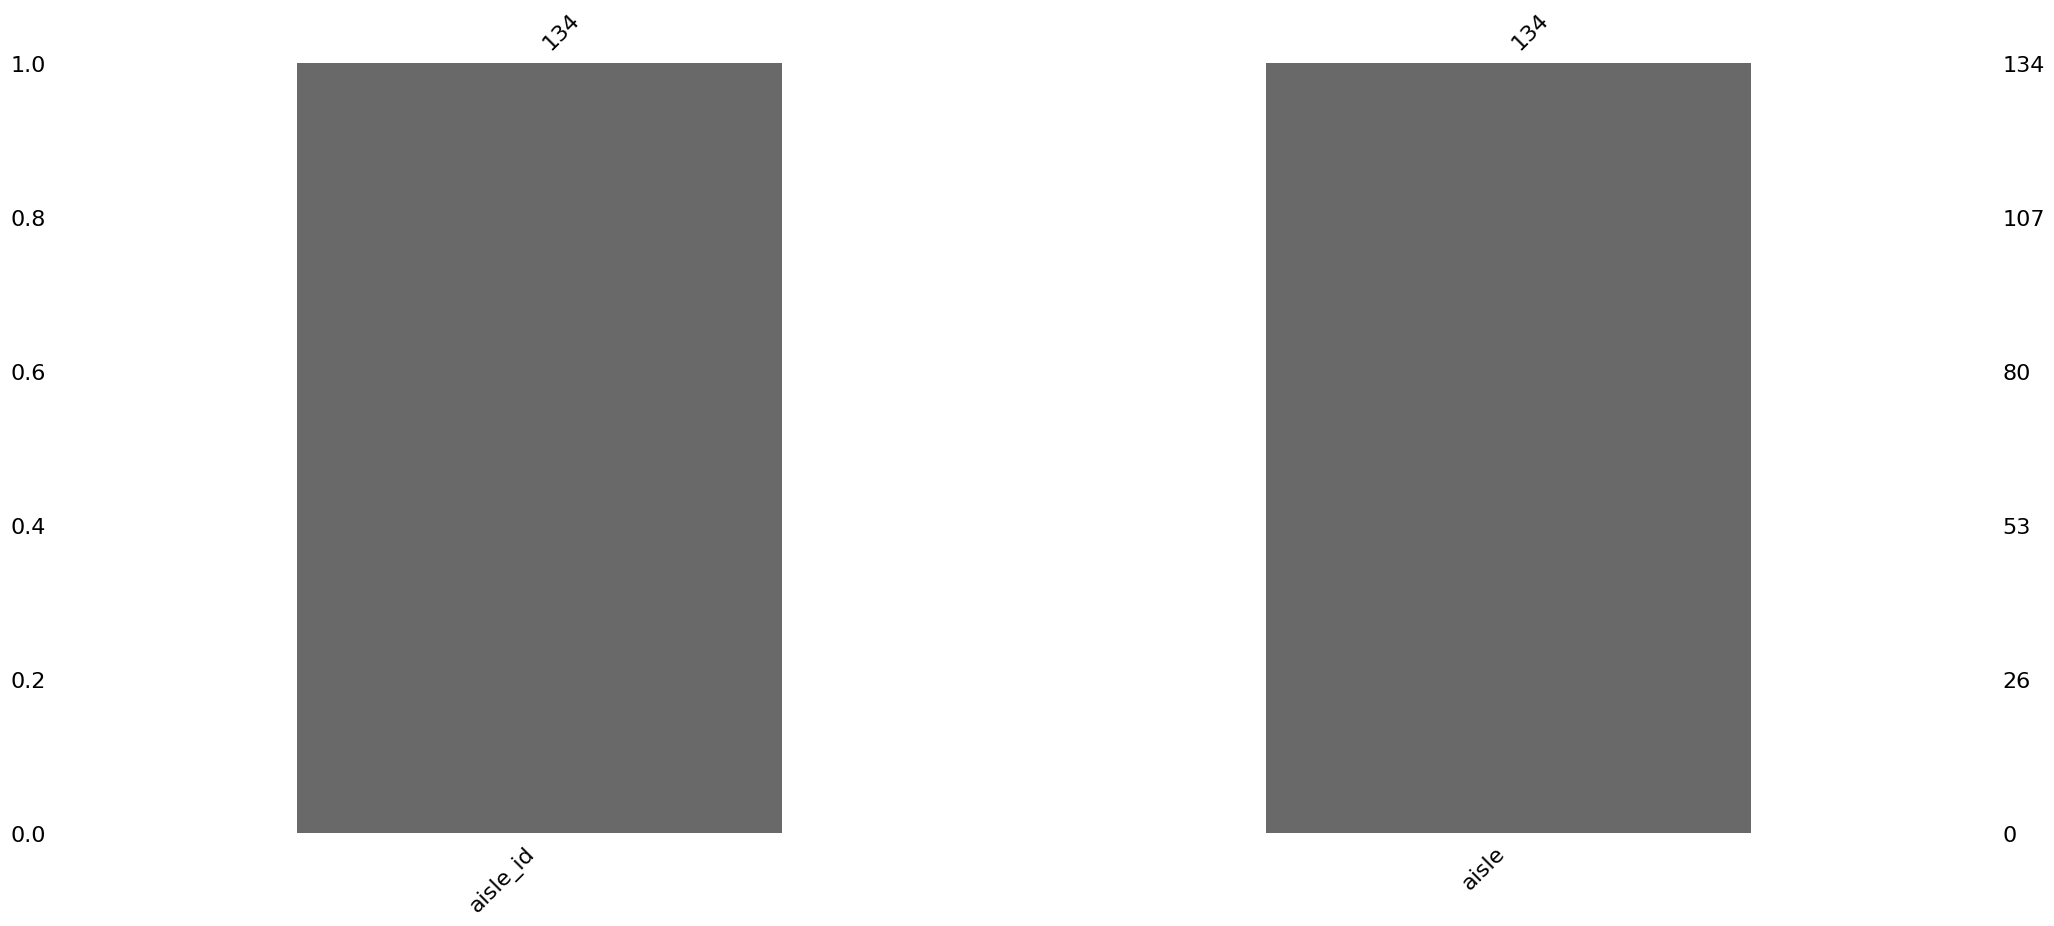

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


None

----------------------------------------------------------------------------------------------------
Dados de departments


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Unique values


department_id    21
department       21
dtype: int64

<Axes: >

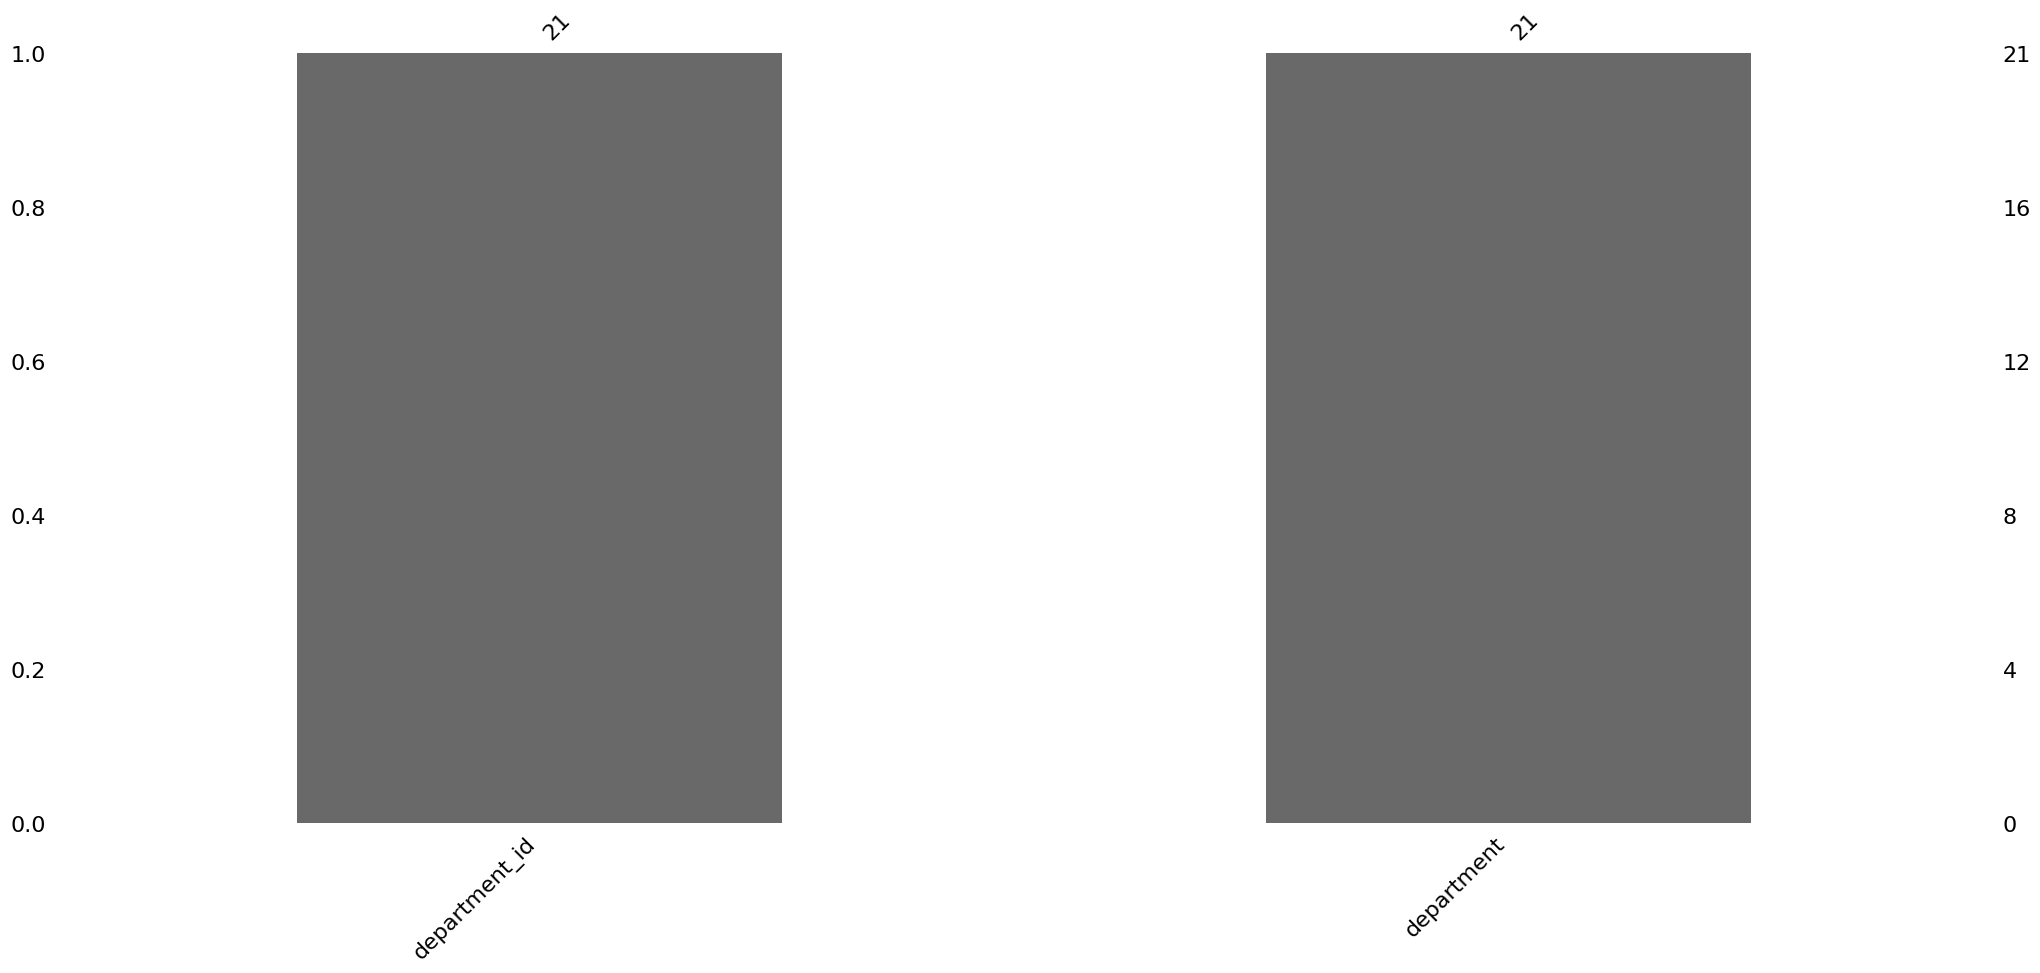

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


None

----------------------------------------------------------------------------------------------------
Dados de order_products


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Unique values


order_id             3346083
product_id             49685
add_to_cart_order        145
reordered                  2
dtype: int64

<Axes: >

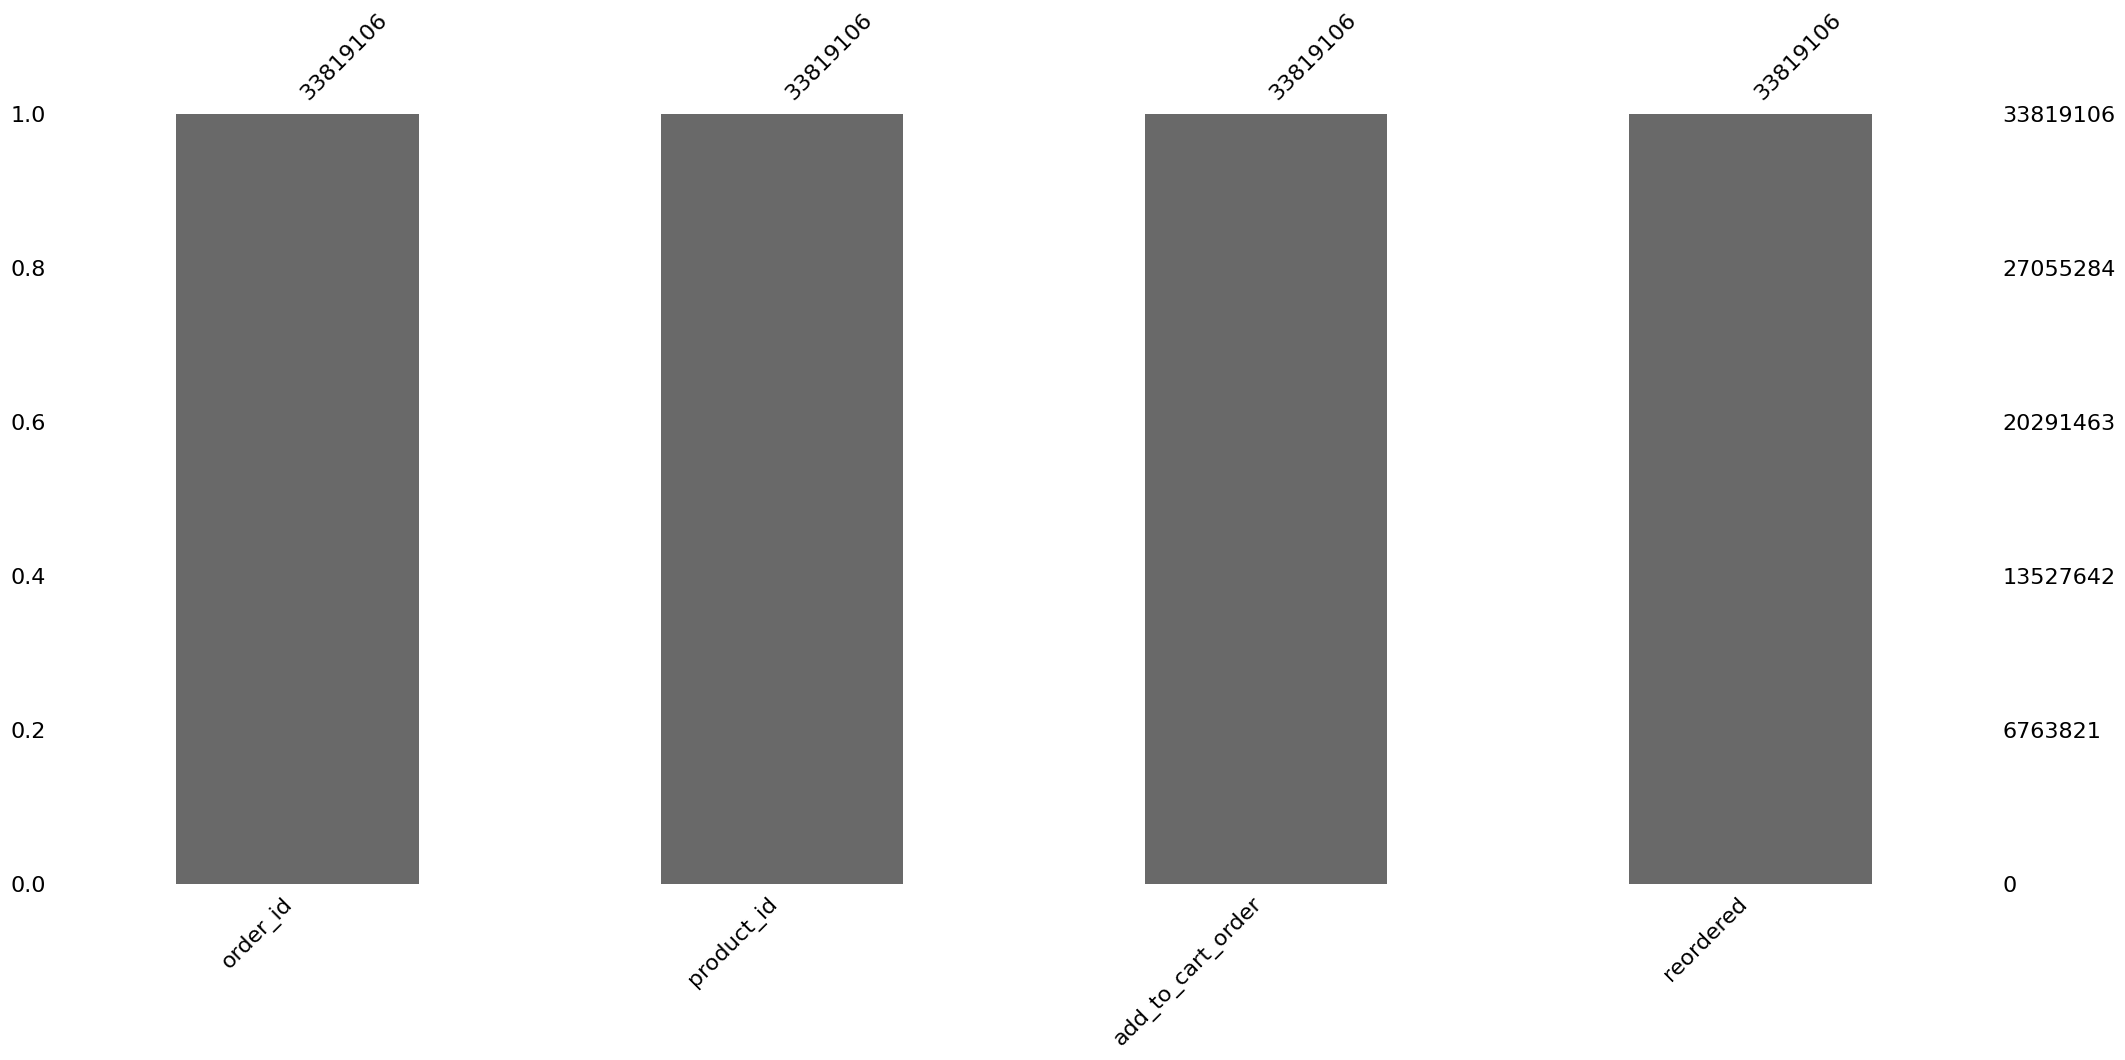

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 4 columns):
 #   Column             Non-Null Count     Dtype
---  ------             --------------     -----
 0   order_id           33819106 non-null  int64
 1   product_id         33819106 non-null  int64
 2   add_to_cart_order  33819106 non-null  int64
 3   reordered          33819106 non-null  int64
dtypes: int64(4)
memory usage: 1.0 GB


None

----------------------------------------------------------------------------------------------------
Dados de orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
47,2196797,5,train,5,0,11,6.0
71,525192,7,train,21,2,11,6.0
75,880375,8,train,4,1,14,10.0


Unique values


order_id                  131209
user_id                   131209
eval_set                       1
order_number                  97
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
dtype: int64

<Axes: >

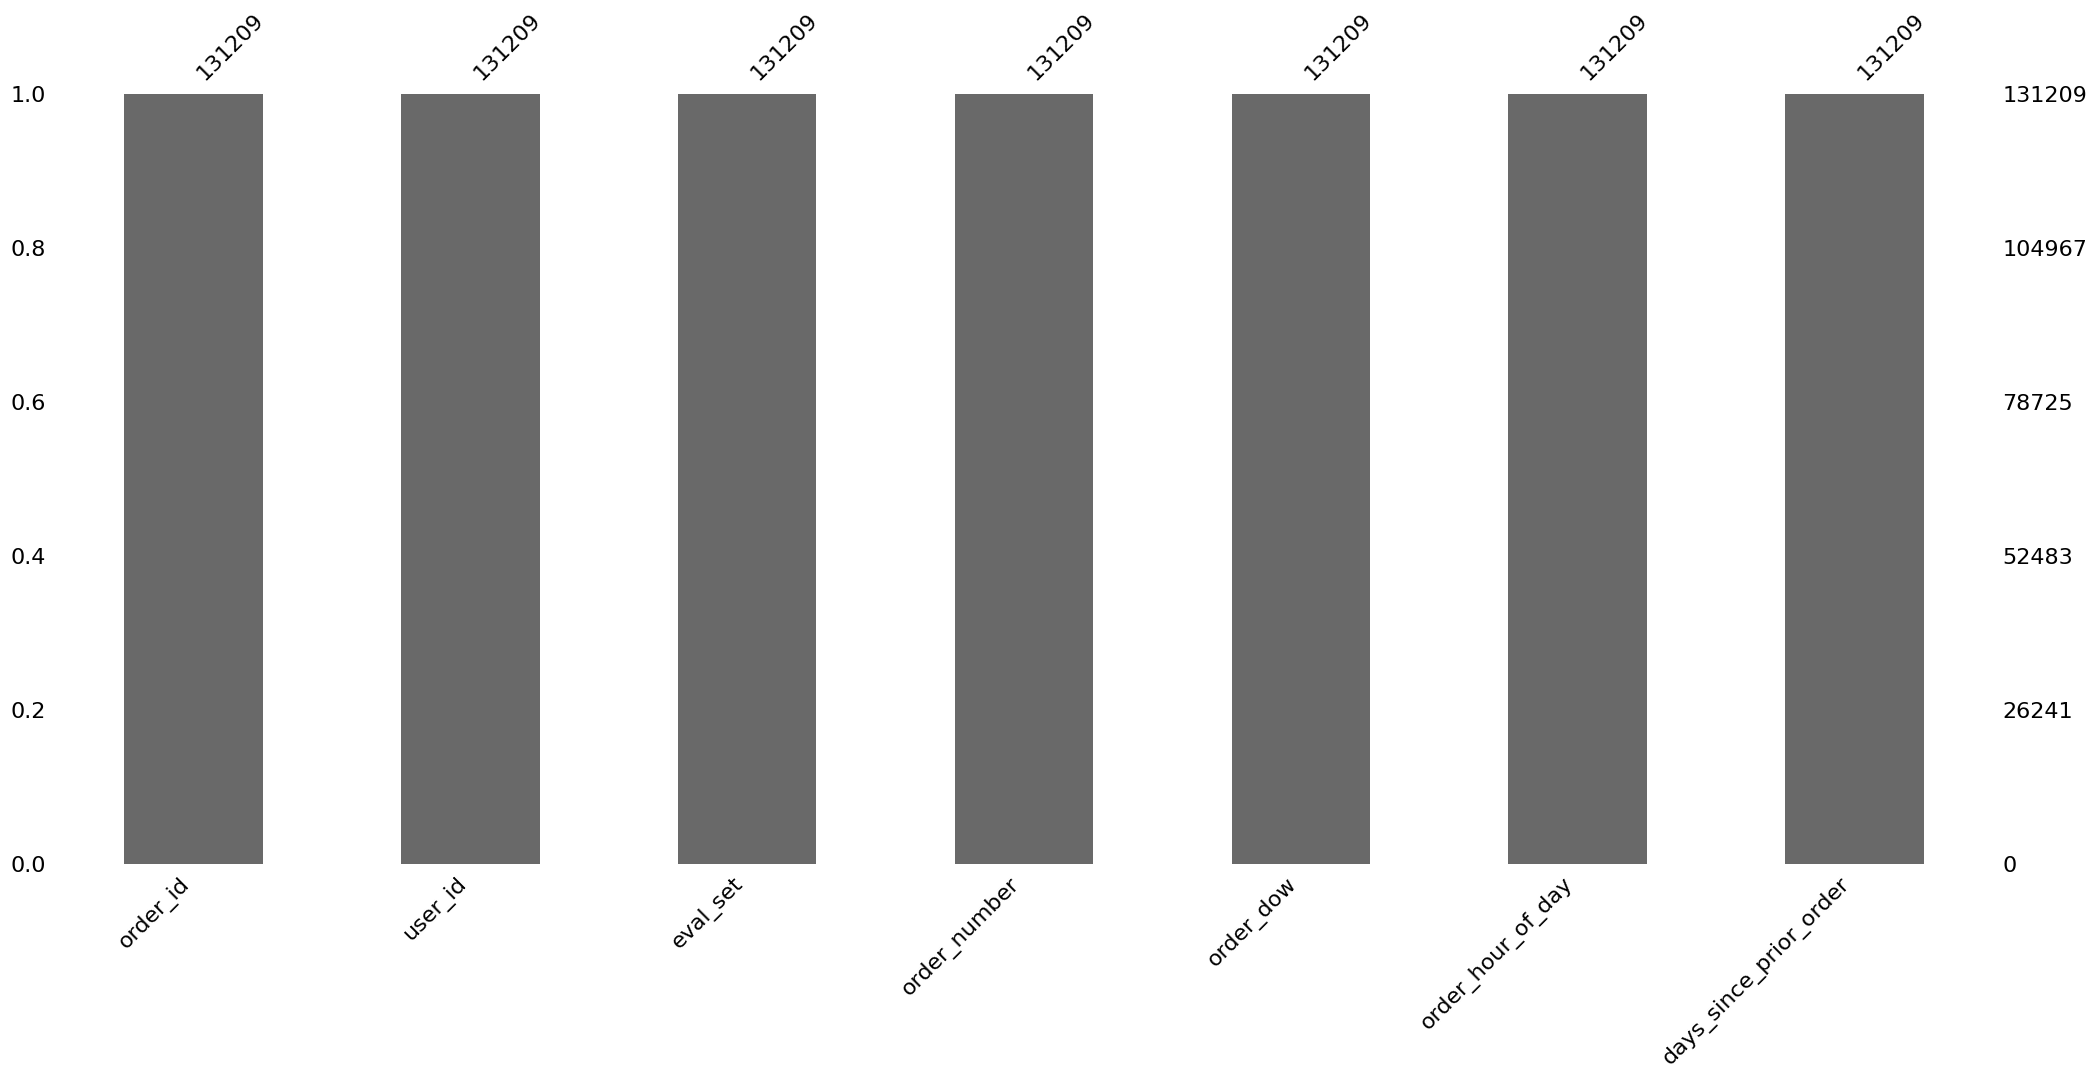

<class 'pandas.core.frame.DataFrame'>
Index: 131209 entries, 10 to 3346082
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                131209 non-null  int64  
 1   user_id                 131209 non-null  int64  
 2   eval_set                131209 non-null  object 
 3   order_number            131209 non-null  int64  
 4   order_dow               131209 non-null  int64  
 5   order_hour_of_day       131209 non-null  int64  
 6   days_since_prior_order  131209 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 8.0+ MB


None

----------------------------------------------------------------------------------------------------
Dados de products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Unique values


product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

<Axes: >

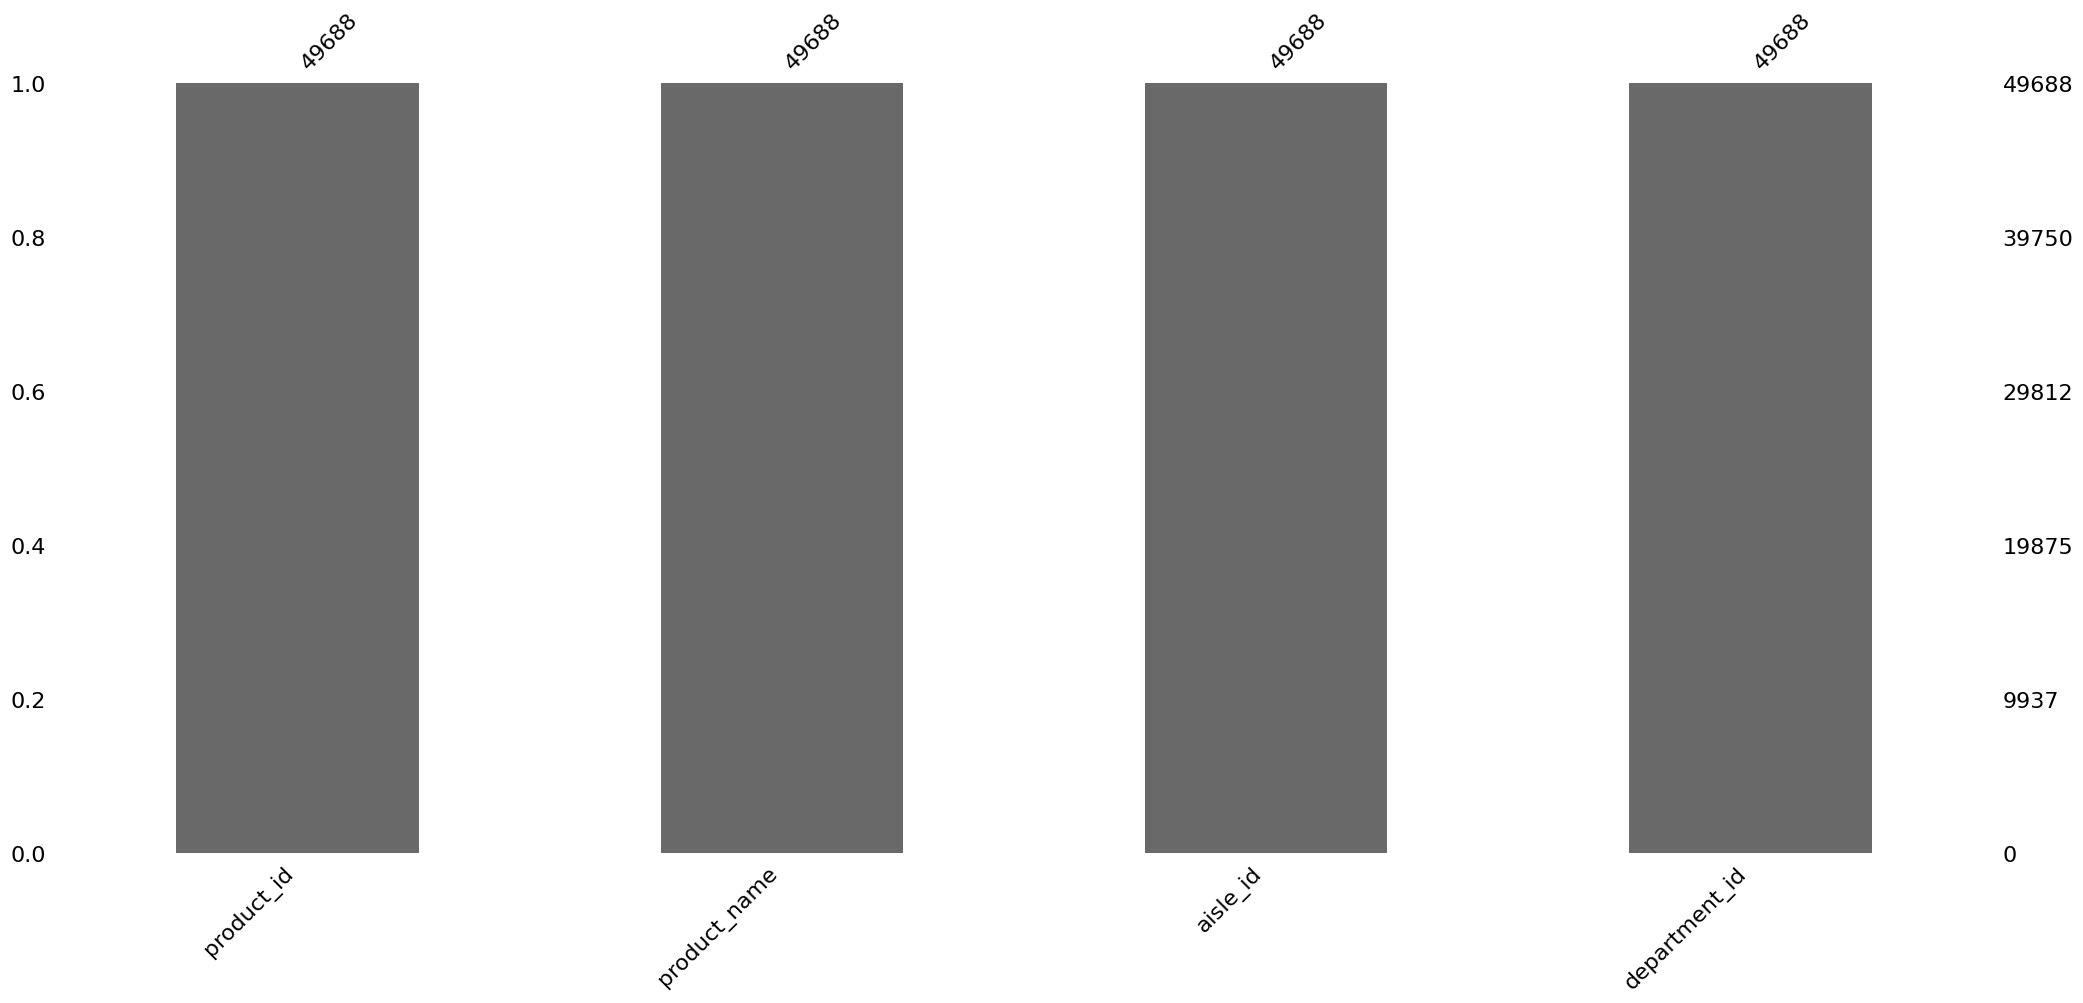

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


None

----------------------------------------------------------------------------------------------------


In [7]:
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.head(5))
    print("Unique values")
    display(df.nunique())
    display(mn.bar(df))
    plt.show()
    display(df.info(show_counts=True))
    print("-"*100)
    


In [8]:
# orders details

orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
47,2196797,5,train,5,0,11,6.0
71,525192,7,train,21,2,11,6.0
75,880375,8,train,4,1,14,10.0


In [9]:
orders_df.eval_set.value_counts()

eval_set
train    131209
Name: count, dtype: int64

In [10]:
order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


### **3.4. Verify outliers**

In [ ]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.info())

#### **3.4.1. Unique values verification**

**order_products dataset**

In [12]:
order_products_df.reordered.value_counts(dropna=False)

reordered
1    19955360
0    13863746
Name: count, dtype: int64

**orders dataset**

In [13]:
orders_df.order_number.value_counts(dropna=False).sort_index()

order_number
4      15300
5      12439
6      10337
7       8853
8       7357
       ...  
96        44
97        30
98        31
99        31
100      867
Name: count, Length: 97, dtype: int64

In [14]:
orders_df.order_dow.value_counts(dropna=False).sort_index()

order_dow
0    27465
1    19672
2    16119
3    15687
4    15959
5    17406
6    18901
Name: count, dtype: int64

In [15]:
orders_df.order_hour_of_day.value_counts(dropna=False).sort_index()

order_hour_of_day
0       852
1       507
2       305
3       223
4       218
5       402
6      1121
7      3376
8      6343
9      9033
10    10585
11    10610
12    10622
13    10711
14    11103
15    11075
16    10495
17     9353
18     7558
19     5721
20     3978
21     3050
22     2442
23     1526
Name: count, dtype: int64

In [16]:
orders_df.days_since_prior_order.value_counts(dropna=False).sort_index()

days_since_prior_order
0.0      2126
1.0      2716
2.0      3496
3.0      4016
4.0      4606
5.0      5025
6.0      6207
7.0      9154
8.0      5371
9.0      3868
10.0     3219
11.0     2927
12.0     3015
13.0     3452
14.0     4516
15.0     2975
16.0     2211
17.0     1875
18.0     1828
19.0     1859
20.0     2142
21.0     2621
22.0     1832
23.0     1474
24.0     1304
25.0     1240
26.0     1218
27.0     1457
28.0     1898
29.0     1442
30.0    40119
Name: count, dtype: int64

**products dataset**

In [17]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
products_df.aisle_id.unique()

array([ 61, 104,  94,  38,   5,  11,  98, 116, 120, 115,  31, 119,  74,
        56, 103,  35,  79,  63,  40,  20,  49,  47,   3,  41, 127, 121,
        81, 123, 107, 131, 106,  69, 100,  64,  78,  83,  58,  66,  87,
        14, 105,  22, 134,  23, 111, 128,  50,   9,  96,  92,  89,  88,
       130,  26,  77,  65,  12,  95,  19,   7,   6,  97,   2, 112,  10,
        51,  13,  75,  70,  93,  34,  62,  21,  29,  45, 118,   4, 108,
        37, 109,  91,  24,  67, 132,  25, 129,  46,  16,  52,  17,  73,
       122,  42,  59, 126,  33,   1,   8,  82, 114, 124, 117,  72, 110,
        85,  44,  80, 101,  84,  30,  27,  90,  48, 133,  53,  28,  68,
        43, 125,  57,  15,  55,  36,  54, 102,  60,  99,  18,  39,  71,
       113,  86,  32,  76], dtype=int64)

In [19]:
products_df.department_id.unique()


array([19, 13,  7,  1, 11, 16, 17, 18, 12,  9,  8, 14, 15,  4, 21,  6, 20,
        5,  3,  2, 10], dtype=int64)

In [20]:
# Function to detect and visualize outliers based on the IQR
def detect_and_plot_outliers(df, column_name):
    print(f"Outlier removing from {column_name}")
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Print statistical details
    print(f"IQR = {IQR}")
    print(f"Lower Bound = {lower_bound}")
    print(f"Upper Bound = {upper_bound}")
    print(f"Min = {df[column_name].min()}")
    print(f"Max = {df[column_name].max()}")
    
    # Plot histogram
    plt.figure(figsize=(10, 3))
    plt.hist(df[column_name], bins=50, color='blue', alpha=0.7)
    plt.axvline(x=lower_bound, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=upper_bound, color='r', linestyle='dashed', linewidth=2)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Create a boolean mask where true indicates the presence of an outlier
    outliers_mask = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    
    # Print percentage of outliers
    print(f"Outliers percentage in the dataset: {round(np.mean(outliers_mask) * 100, 2)}%")
    print("-"*100)
    # Return the dataframe without outliers
    return df[~outliers_mask]


### **Apply the outlier detection to order_products dataframe**

Outlier removing from add_to_cart_order
IQR = 8.0
Lower Bound = -9.0
Upper Bound = 23.0
Min = 1
Max = 145


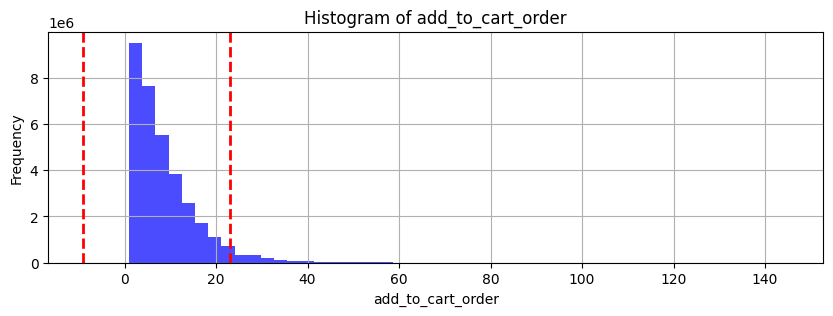

Outliers percentage in the dataset: 4.22%
----------------------------------------------------------------------------------------------------


In [21]:
outliers_removed_order_products_df = detect_and_plot_outliers(order_products_df, 'add_to_cart_order')



### **Apply the outlier detection to orders dataframe**

Outlier removing from days_since_prior_order
IQR = 23.0
Lower Bound = -27.5
Upper Bound = 64.5
Min = 0.0
Max = 30.0


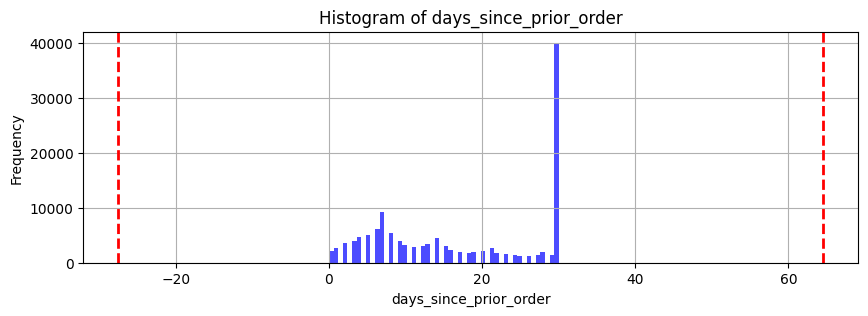

Outliers percentage in the dataset: 0.0%
----------------------------------------------------------------------------------------------------
Outlier removing from order_number
IQR = 14.0
Lower Bound = -15.0
Upper Bound = 41.0
Min = 4
Max = 100


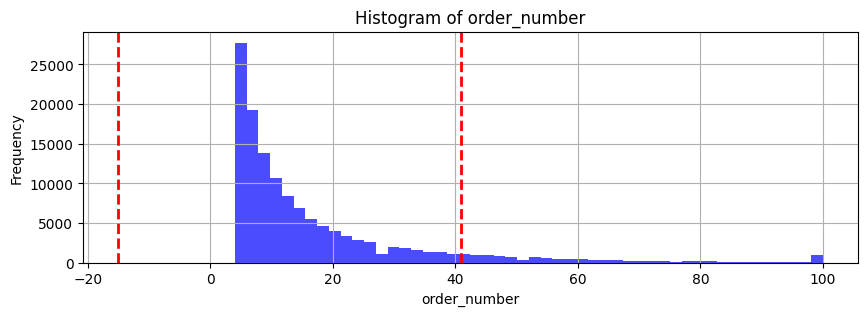

Outliers percentage in the dataset: 8.26%
----------------------------------------------------------------------------------------------------


In [23]:
outliers_removed_orders_df = detect_and_plot_outliers(orders_df, 'days_since_prior_order')
outliers_removed_orders_df = detect_and_plot_outliers(outliers_removed_orders_df, 'order_number')

### **3.5. Data merge**

In [24]:
aisles_df.aisle_id = aisles_df.aisle_id.astype('category')
aisles_df.aisle = aisles_df.aisle.astype('category')

departments_df.department_id = departments_df.department_id.astype('category')
departments_df.department = departments_df.department.astype('category')

products_df.product_id = products_df.product_id.astype('category')
products_df.product_name = products_df.product_name.astype('category')
products_df.aisle_id = products_df.aisle_id.astype('category')
products_df.department_id = products_df.department_id.astype('category')

order_products_df.order_id = order_products_df.order_id.astype('category')
order_products_df.product_id = order_products_df.product_id.astype('category')

orders_df.order_id = orders_df.order_id.astype('category')
orders_df.user_id = orders_df.user_id.astype('category')
orders_df.eval_set = orders_df.eval_set.astype('category')

In [25]:
products_df = pd.merge(products_df, aisles_df, on='aisle_id', how='left')
products_df = pd.merge(products_df, departments_df, on='department_id', how='left')

In [26]:
merged_df = pd.merge(order_products_df, products_df, on='product_id', how='left')

In [27]:
len(orders_df)

131209

In [28]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
47,2196797,5,train,5,0,11,6.0
71,525192,7,train,21,2,11,6.0
75,880375,8,train,4,1,14,10.0


In [29]:
final_df = pd.merge(merged_df, orders_df, on='order_id', how='inner')

In [30]:
len(final_df)

1384617

# **4. Exploratory Data Analysis (EDA)**

### **4.1. Order Quantity Analysis**

**Key Questions:**
1. **How many orders include multiple products?**
2. **How many orders have five or more products?**
3. **How many orders include ten or more products?**

In [32]:

order_id_agg = final_df.groupby("order_id").agg(count = ("order_id", "count"))
top_orders = order_id_agg.sort_values(by = ["count"], ascending = False)
top_orders = order_id_agg.sort_values(by = ["count"], ascending = False)

gt_one = len(top_orders[top_orders["count"] > 1])
ge_five = len(top_orders[top_orders["count"] >= 5])
ge_ten = len(top_orders[top_orders["count"] >= 10])
print(f"""Ordering more than one product: {gt_one} or {round(gt_one/len(top_orders)*100, 1)}% of total orders
Orders of 5 or more products: {ge_five} or {round(ge_five/len(top_orders)*100, 1)}% of total orders
Orders of 10 or more products: {ge_ten} or {round(ge_ten/len(top_orders)*100, 1)}% of total orders
""")

Ordering more than one product: 124364 or 94.8% of total orders
Orders of 5 or more products: 100745 or 76.8% of total orders
Orders of 10 or more products: 59401 or 45.3% of total orders





**Interpretation of Results:**

- **Orders with multiple products:** 124,364 (94.8% of total orders). This indicates that most customers buy several items per visit, suggesting preference for comprehensive shopping.
  
- **Orders with 5+ products:** 100,745 (76.8%). This large portion of orders suggests regular stock-up behavior, likely driven by routine shopping needs.

- **Orders with 10+ products:** 59,401 (45.3%). A significant fraction of customers engage in bulk purchases, indicating shopping for households or events.

**Strategic Implications:**

- **Marketing:** Focus on promotions that encourage buying in bulk, such as discounts for larger baskets.
  
- **Inventory:** Ensure availability of high-demand items to satisfy bulk purchase habits.

- **Store Layout:** Optimize store layout to support easy access to frequently bought items, enhancing the shopping experience for bulk buyers.


### **4.2. Order Volume By Departments**

         department  orders [k]  percent
0           produce       409.1     29.5
1        dairy eggs       217.1     15.7
2            snacks       118.9      8.6
3         beverages       114.0      8.2
4            frozen       100.4      7.3
5            pantry        81.2      5.9
6            bakery        48.4      3.5
7      canned goods        46.8      3.4
8              deli        44.3      3.2
9   dry goods pasta        38.7      2.8
10        household        36.0      2.6
11     meat seafood        30.3      2.2
12        breakfast        29.5      2.1
13    personal care        21.6      1.6
14           babies        14.9      1.1
15    international        11.9      0.9
16          missing         8.3      0.6
17          alcohol         5.6      0.4
18             pets         4.5      0.3
19            other         1.8      0.1
20             bulk         1.4      0.1
Total order: 1.4 M


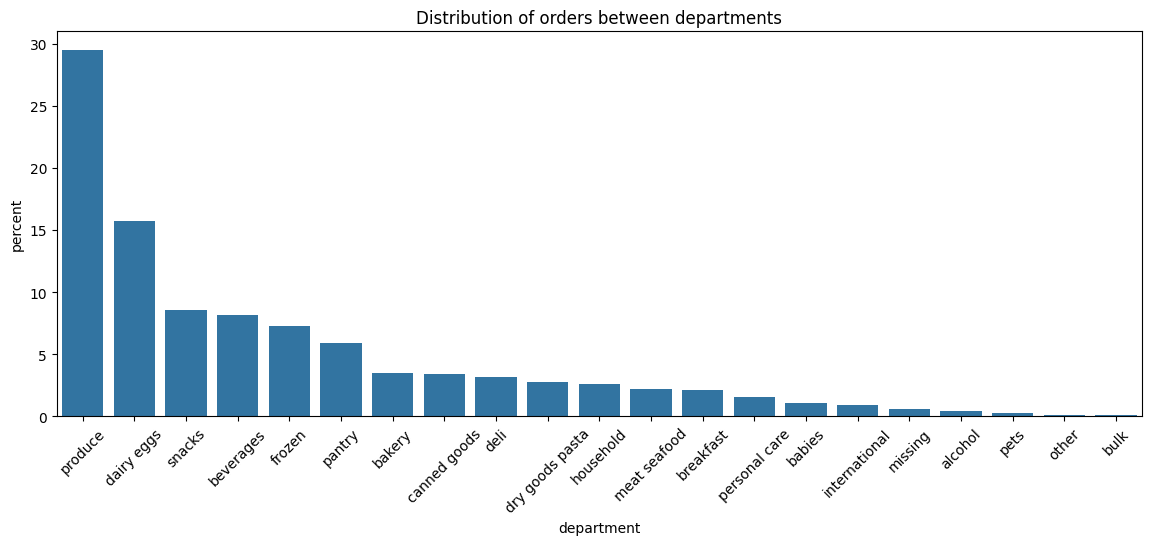

In [40]:
def plot_order_volume_by_department():

    df1 = final_df.department.value_counts(ascending = False).to_frame()

    df1["percent"] = round(df1["count"]/df1["count"].sum()*100, 1)
    df1["count"] = round(df1["count"]/1000, 1)
    df1 = df1.rename(columns={"count": "orders [k]"})
    df1.reset_index(inplace= True)
    print(df1)
    print(f"Total order: {round(len(final_df)/1000_000, 1)} M")
    plt.figure(figsize=(14, 5))
    sns.barplot(data = df1, x = "department", y = "percent", order=df1['department'])
    plt.title("Distribution of orders between departments")
    plt.xticks(rotation = 45);
plot_order_volume_by_department()

### **Insights**

Several key insights into the distribution of orders across different departments in a retail dataset:

**Order Concentration**
- The **`produce`** department leads with a significant 29.5% share of total orders, amounting to 409.1k orders, indicating a strong consumer preference for fresh and perishable goods.
  
- **`dairy eggs`** is the second most popular department, accounting for 15.7% of orders, reflecting regular purchases of essential food items.

**Order Distribution**
- There is a sharp drop in order percentages after the top-selling departments, with departments like **`snacks`** and **`beverages`** representing only 8.6% and 8.2%, respectively.

**Lower Volume Departments**
- Departments like **`alcohol`**, **`pets`**, **`other`**, and **`bulk`** contribute less than 1% each to total orders, likely reflecting niche markets with fewer regular buyers.

### **Which Products Lead Sales in Each Department?**

In [42]:
# Converting data types enhances the efficiency of graph plotting by ensuring faster processing and accurate data representation.

final_df.aisle_id = final_df.aisle_id.astype('Int64')
final_df.aisle = final_df.aisle.astype('object')

final_df.department_id = final_df.department_id.astype('Int64')
final_df.department = final_df.department.astype('object')

final_df.product_id = final_df.product_id.astype('Int64')
final_df.product_name = final_df.product_name.astype('object')
final_df.aisle_id = final_df.aisle_id.astype('Int64')
final_df.department_id = final_df.department_id.astype('Int64')

final_df.order_id = final_df.order_id.astype('Int64')
final_df.product_id = final_df.product_id.astype('Int64')

final_df.order_id = final_df.order_id.astype('Int64')
final_df.user_id = final_df.user_id.astype('Int64')
final_df.eval_set = final_df.eval_set.astype('object')

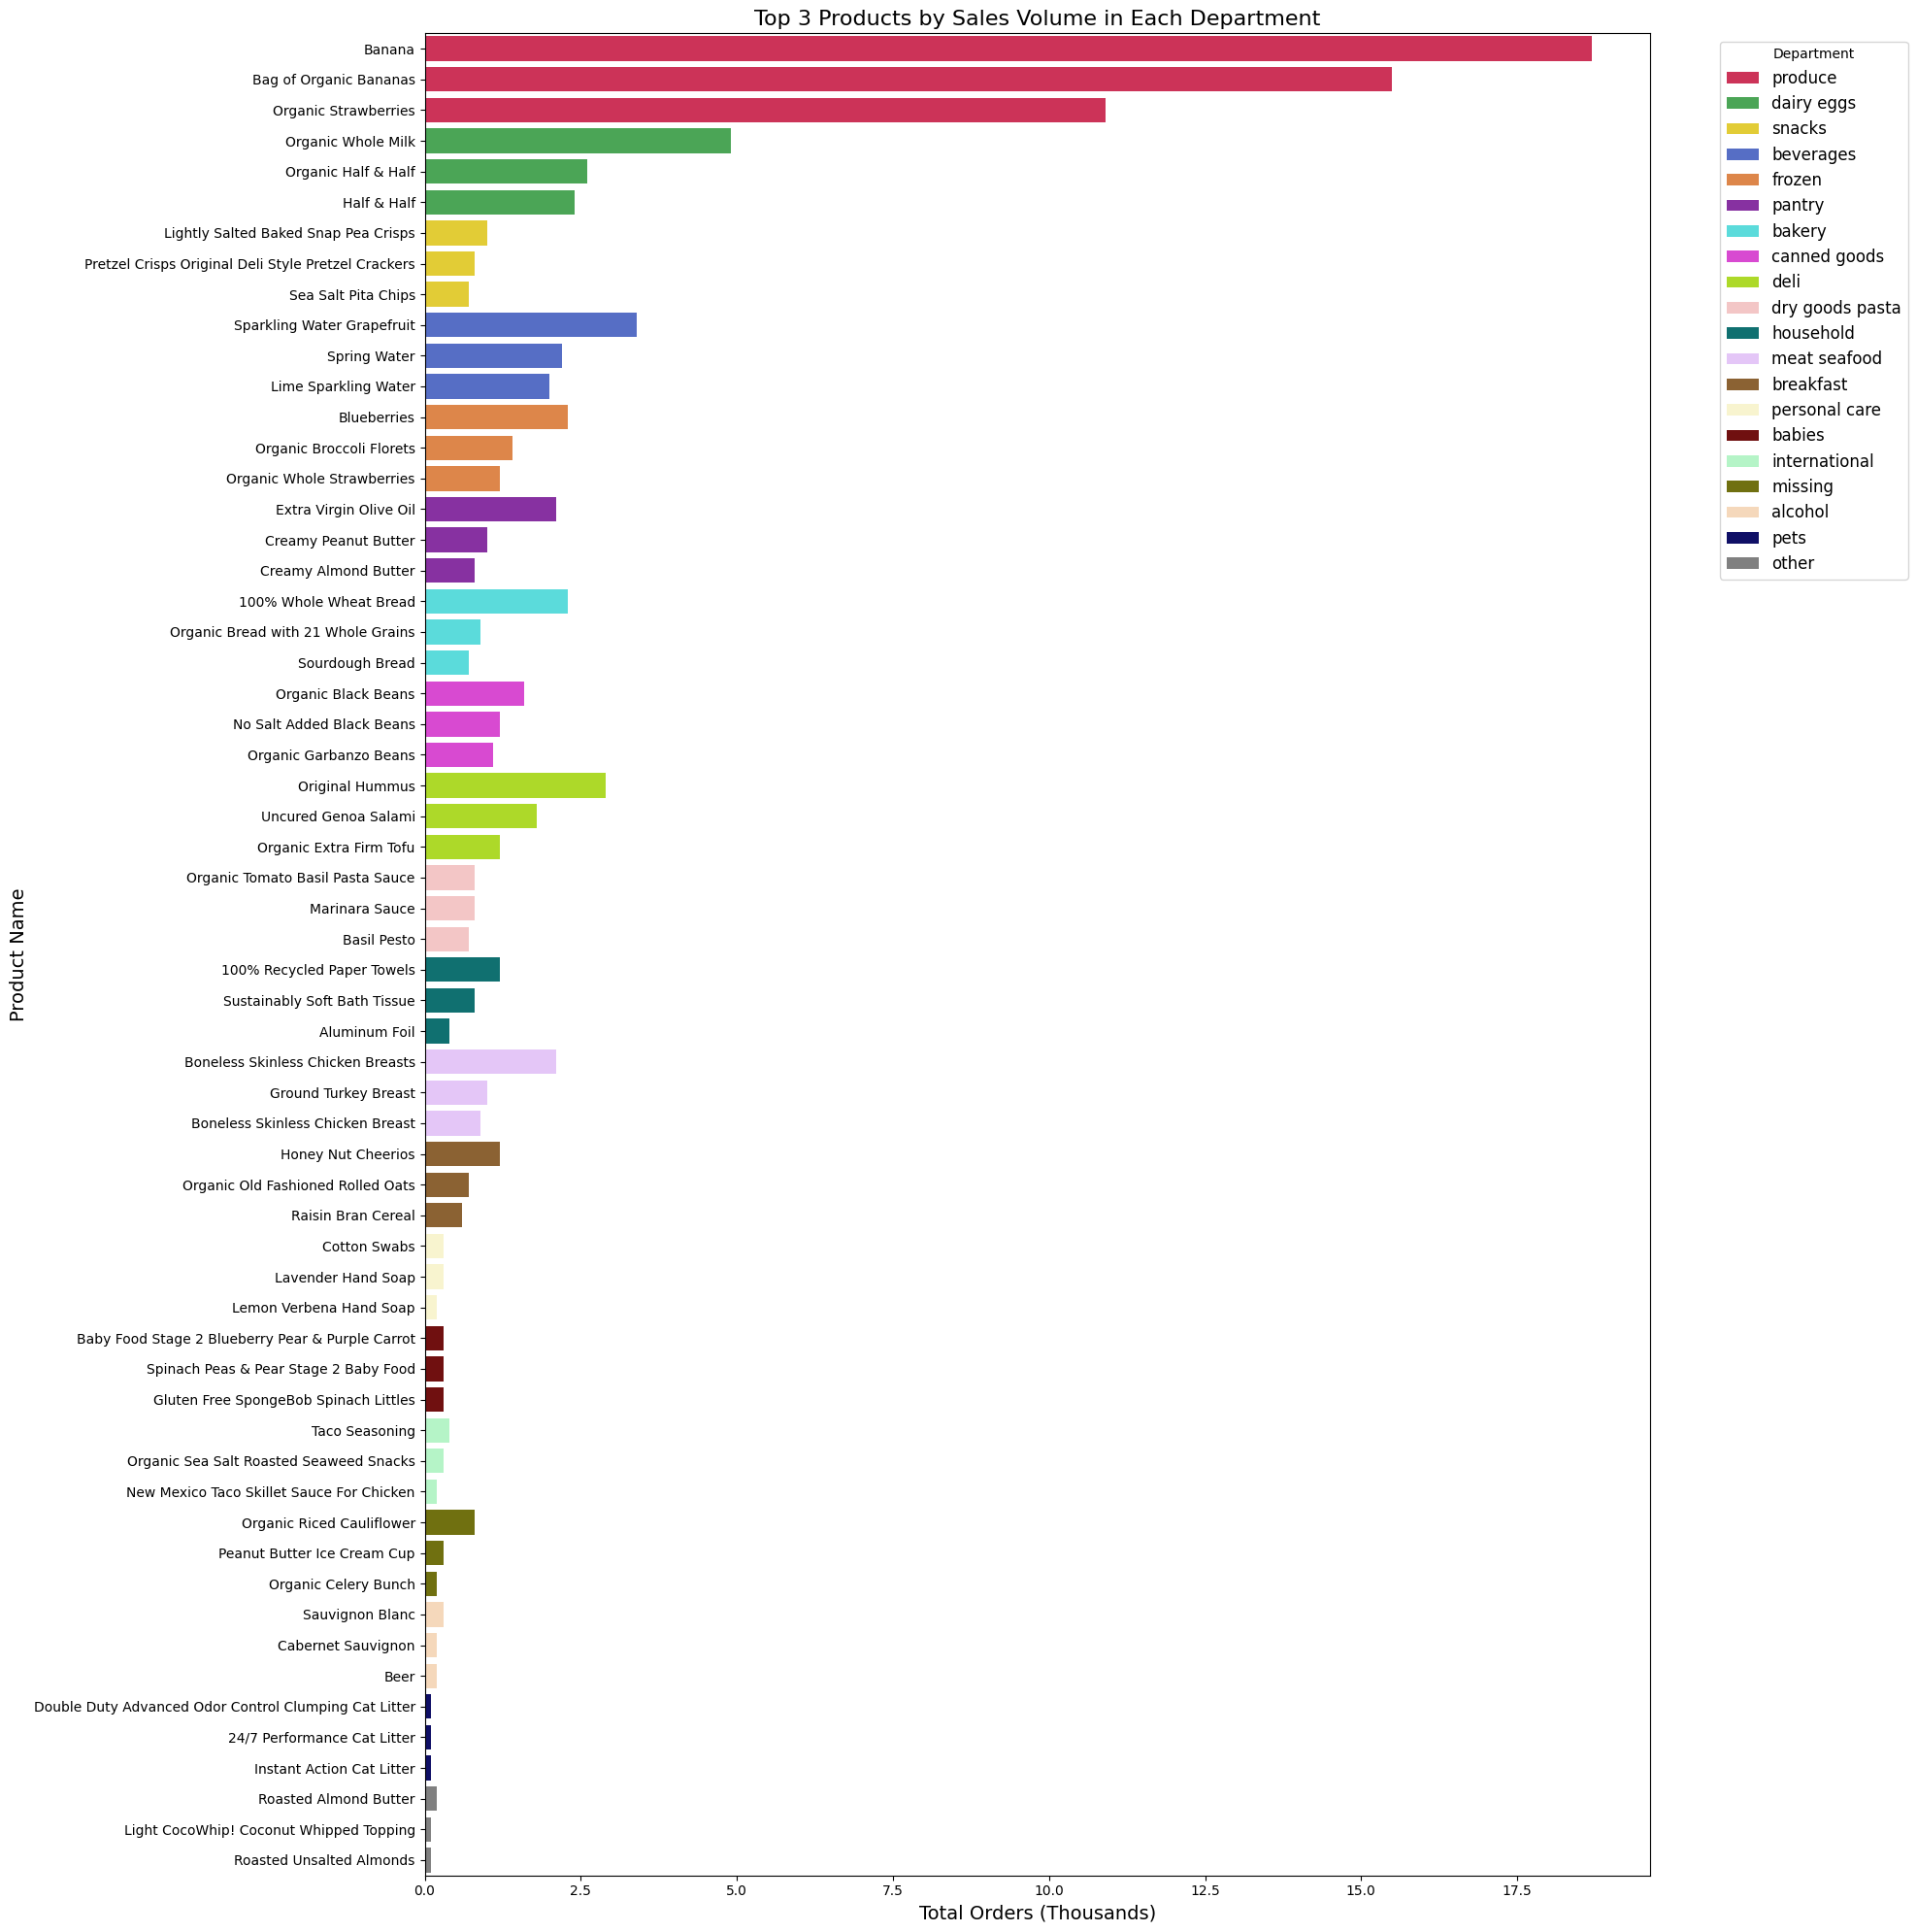

In [68]:
def top_n_product_by_order_volume_in_each_department(top_n_products = 3, n_top_departments = -1):
    """
    Generates a bar plot visualizing the top N products by sales volume within each department.

    This function aggregates order data to identify the top-selling products in each department based on the total number of orders. It then visualizes this information in a bar chart, allowing for easy comparison across departments and products. The function can be customized to display a specific number of top products and departments.

    Parameters:
    - top_n_products (int): The number of top products to display per department.
    - n_top_departments (int): The number of top departments to include in the visualization. Use -1 to include all departments.

    Returns:
    - None: Displays a matplotlib bar plot of the top N products by order volume in each department.

    Example:
    >>> top_n_product_by_order_volume_in_each_department(top_n_products=3, n_top_departments=5)
    This will display a bar plot for the top 5 departments, each showing their top 3 products based on order volume.
    """
    aggregated_data = final_df.groupby(['department', 'product_name']).size().reset_index(name='orders').sort_values(by=['department', 'product_name'])

    # Initializing the list to store DataFrames of the top 3 products per department
    top_products_list = []
    
    df1 = final_df.department.value_counts(ascending = False).to_frame()
    df1["percent"] = round(df1["count"]/df1["count"].sum()*100, 1)
    df1["count"] = round(df1["count"]/1000, 1)
    df1 = df1.rename(columns={"count": "orders [k]"})
    df1.reset_index(inplace= True)
    
    # Iterating over unique departments
    for department in df1.department.unique()[:n_top_departments]:
        # Filtering data for the current department
        dept_data = aggregated_data[aggregated_data.department == department].copy()
        
        # Converting orders to thousands ('k') using .loc[]
        dept_data.loc[:, 'orders [k]'] = round(dept_data['orders'] / 1000, 1)
        
        # Selecting the top 3 products based on order volume
        top_products = dept_data.nlargest(top_n_products, 'orders')
        top_products.loc[:, 'department'] = department  # Ensuring department column is updated for clarity
        top_products_list.append(top_products)


    # Consolidating the top 3 products from all departments
    all_top_products = pd.concat(top_products_list)

    # Setting a custom color palette
    custom_palette = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#bbffff", "#e61941"]
    sns.set_palette(custom_palette)


    # Visualization focusing on sales volume
    plt.figure(figsize=(20, 20))
    barplot = sns.barplot(data=all_top_products, x="orders [k]", y="product_name", hue="department", dodge=False)

    # Enhancing readability
    plt.title(f"Top {top_n_products} Products by Sales Volume in Each Department", fontsize=16)
    plt.xlabel("Total Orders (Thousands)", fontsize=14)
    plt.ylabel("Product Name", fontsize=14)
    plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()
    

top_n_product_by_order_volume_in_each_department(top_n_products = 3, n_top_departments = -1)


### How This Graph Helps

Data: Train Data

The train dataset was analyzed. For this analysis, daily or weekly breakdowns were not performed to allow for a comprehensive comparison of order volumes across the entire data collection period.

This chart provides a detailed look at the top-selling products within selected departments, offering valuable insights into consumer preferences and buying behaviors. By examining specific examples from the data, we can better understand the significance of this visualization:

- **High Volume Sellers in Produce:** The chart highlights 'Banana' with 18.7 thousand orders and 'Bag of Organic Bananas' with 15.5 thousand orders as the top sellers in the produce department. These products significantly outperform others, like 'Organic Strawberries,' which have 10.9 thousand orders. This dominance suggests bananas are a staple in customer shopping lists, indicating consistent demand that requires robust stock management.

- **Dairy and Egg Essentials:** In the dairy and eggs department, 'Organic Whole Milk' leads with 4.9 thousand orders, more than double the orders for 'Organic Half & Half' at 2.6 thousand. This disparity highlights the importance of milk as an essential dairy product, which could influence promotional strategies and shelf placement to maximize visibility and accessibility.

- **Popular Snacks:** In the snacks department, products like 'Lightly Salted Baked Snap Pea Crisps' and 'Pretzel Crisps Original Deli Style Pretzel Crackers' show a considerable variance in orders, with 991 and 753 orders respectively. Understanding the popularity of healthier or unique snack options can guide inventory decisions and marketing campaigns targeting health-conscious consumers.

- **Beverage Preferences:** The beverages department shows a strong preference for 'Sparkling Water Grapefruit' with 3.4 thousand orders, indicating a trend towards flavored water over traditional options like 'Spring Water' with 2.2 thousand orders. This trend could be leveraged in product development and marketing to cater to preferences for flavored, healthier drink choices.

- **Frozen Goods:** The frozen section's top products like 'Blueberries' at 2.3 thousand orders indicate a preference for convenient, healthy frozen fruits. This data can help adjust stock levels and marketing focus towards promoting healthy, easy-to-prepare meal components.

**Strategic Implications:**
- **Inventory Management:** These insights assist in fine-tuning inventory levels to ensure high-demand products are adequately stocked, especially during peak shopping times.
- **Marketing Focus:** Promotional activities can be targeted towards these top sellers to drive foot traffic and increase basket size.
- **Product Placement:** Strategic placement of these high-volume products can enhance visibility and accessibility, improving customer satisfaction and sales.

In summary, this visualization not only identifies the leading products in each department but also provides a quantitative basis for strategic decisions that align with consumer preferences, enhancing operational efficiency and market responsiveness.

### **4.4. Departmental Share of Top Selling Products**

Top Best-Selling Products in Each Department by Percentage within Department

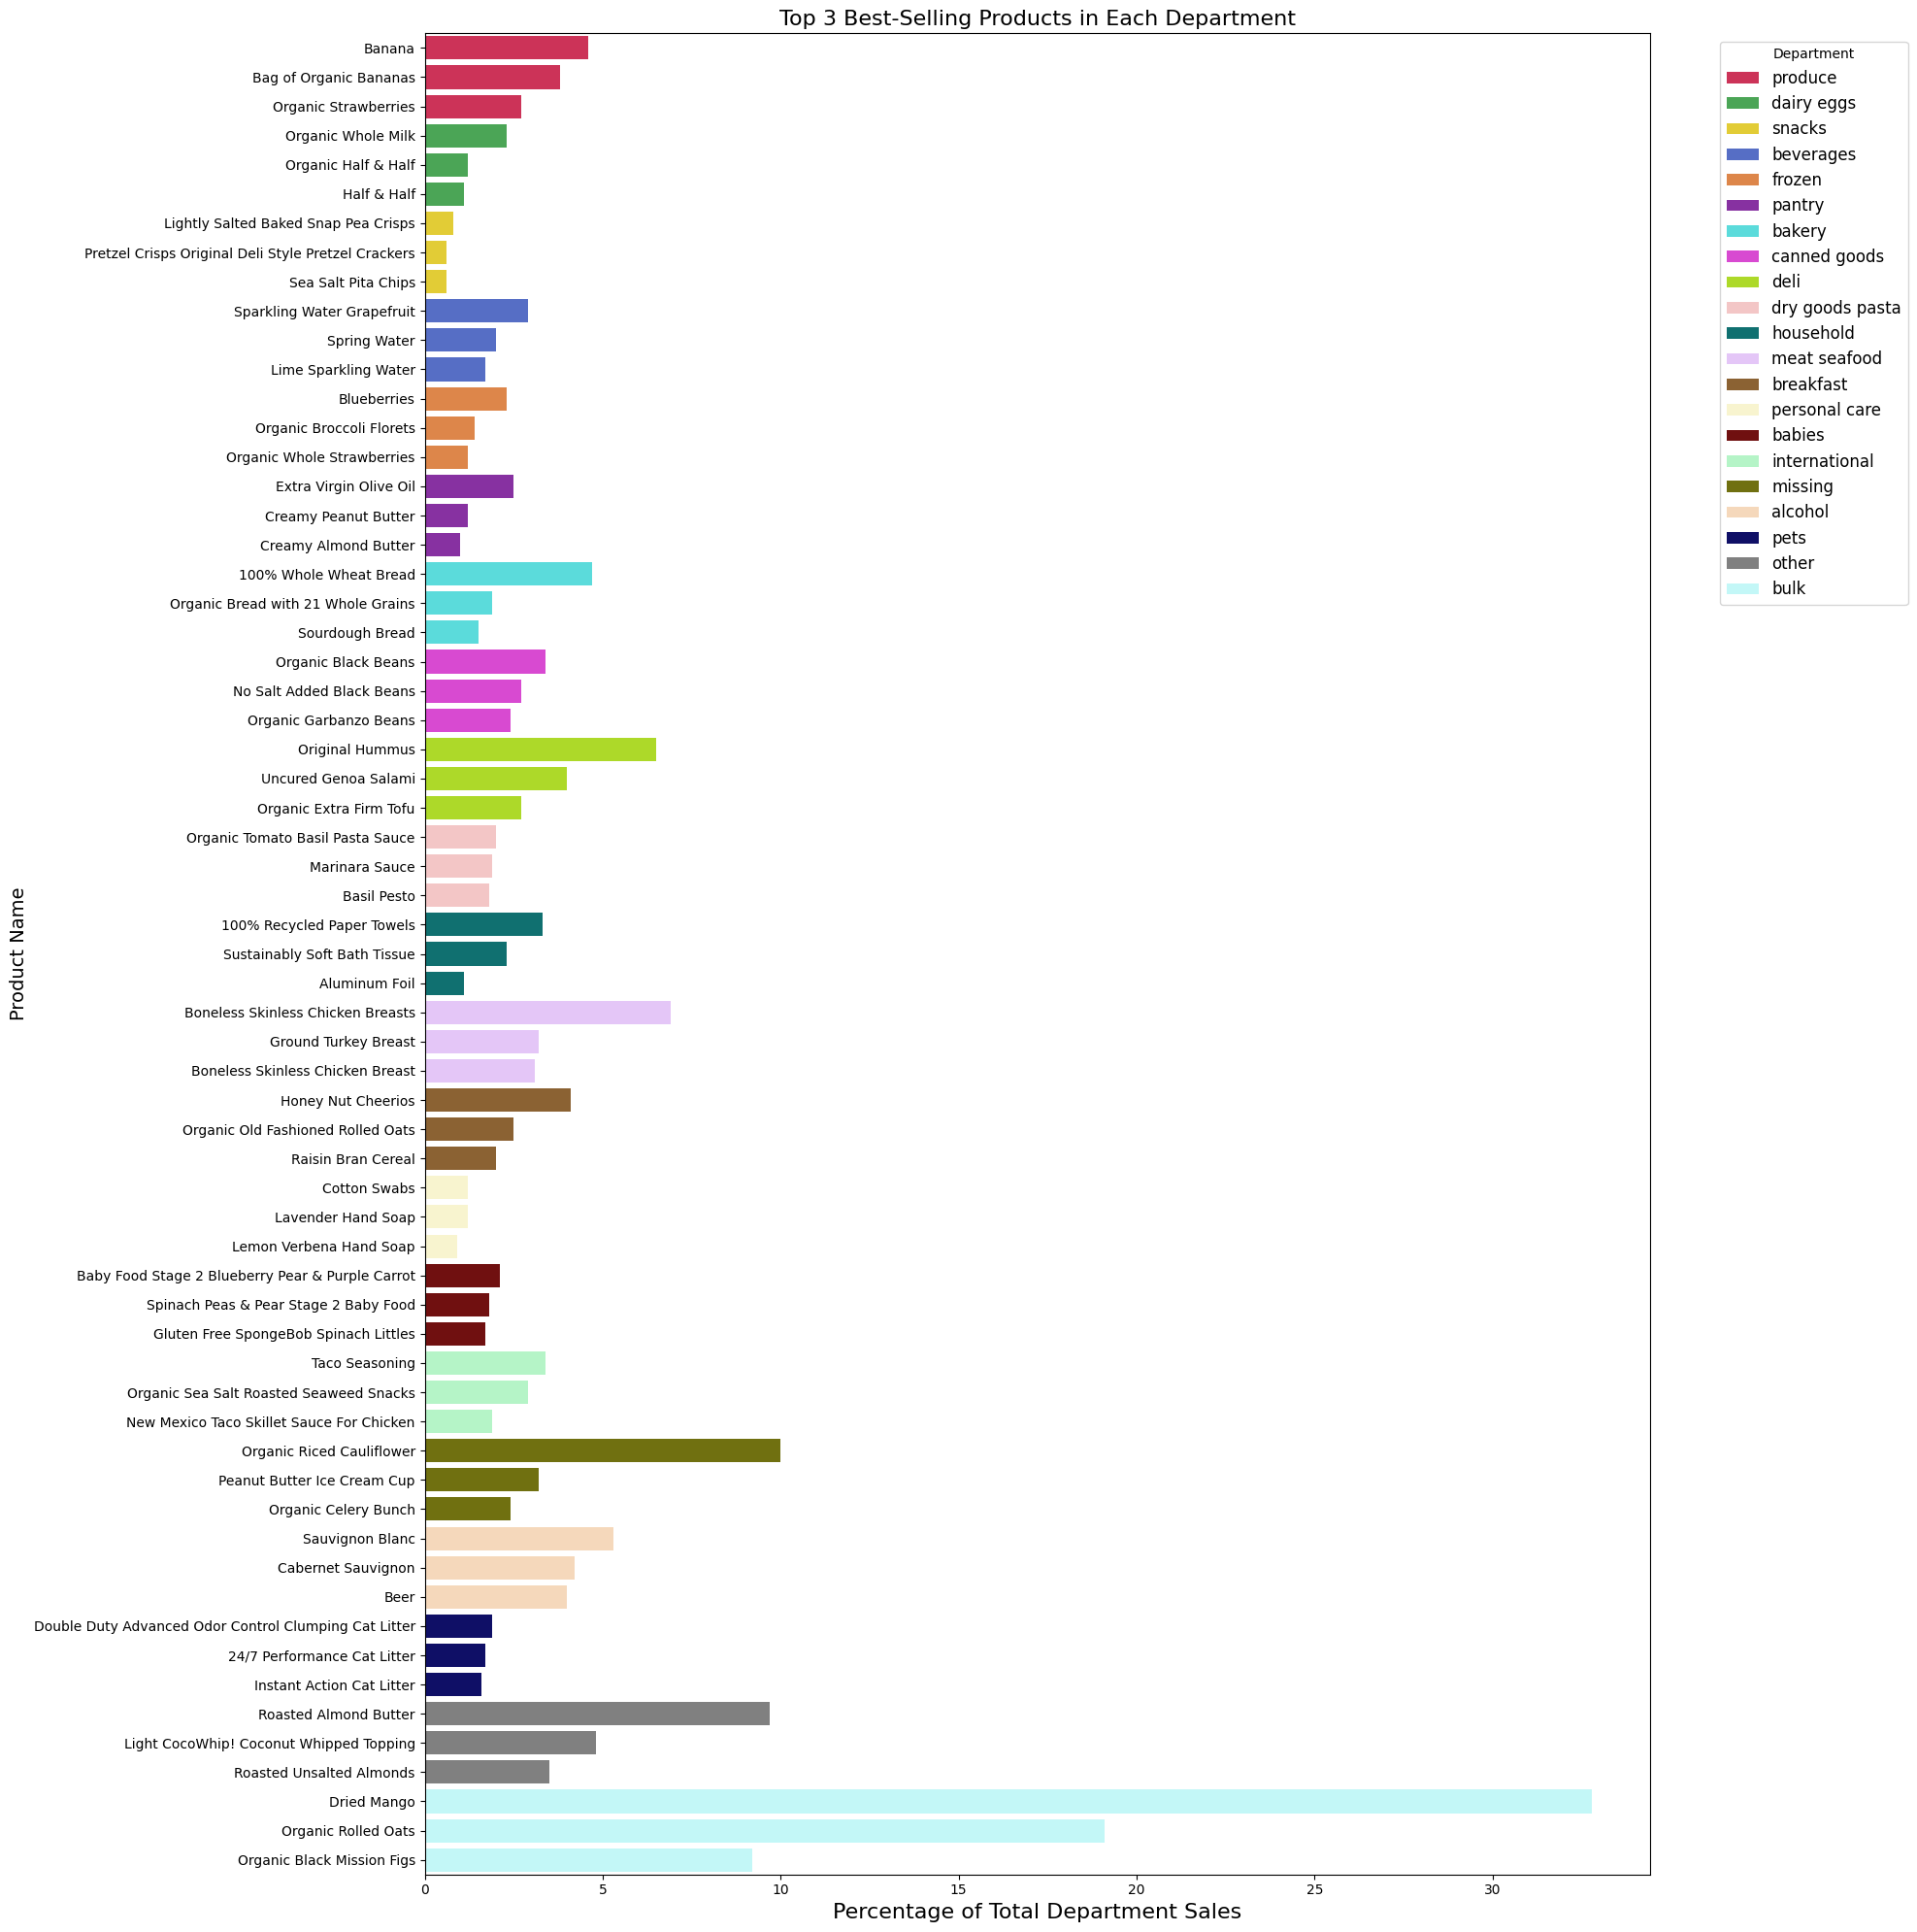

In [84]:

def plot_top_products_by_department_sales(top_n_products = 3):

    # Data Aggregation
    aggregated_data = final_df.groupby(['department', 'product_name']).size().reset_index(name='orders')

    # Calculation of Total Orders by Department
    total_orders_by_department = aggregated_data.groupby('department')['orders'].sum().rename('total_orders')

    # Initialization of a List to Store the DataFrames of the Top n Products
    top_products_list = []

    df1 = final_df.department.value_counts(ascending = False).to_frame()
    df1["percent"] = round(df1["count"]/df1["count"].sum()*100, 1)
    df1["count"] = round(df1["count"]/1000, 1)
    df1 = df1.rename(columns={"count": "orders [k]"})
    df1.reset_index(inplace= True)
    
    # Iteration Over Unique Departments
    for department in df1.department.unique():
        # Filtering Data for the Current Department
        dept_data = aggregated_data[aggregated_data.department == department].copy()
        
        # Calculation of Sales Percentage and Conversion of Orders to Thousands ('k')
        total_orders = total_orders_by_department.loc[department]
        dept_data.loc[:, 'percentage'] = round(dept_data['orders'] / total_orders * 100, 1)  # Sales percentage of each product
        dept_data.loc[:, 'orders [k]'] = round(dept_data['orders'] / 1000, 1)  # Sales volume in thousands
        
        # Selection of the Top 3 Products by Order Volume
        top_products = dept_data.nlargest(top_n_products, 'orders')
        top_products.loc[:, 'department'] = department
        top_products_list.append(top_products)

    # Consolidation of the Top 3 Products from All Departments
    all_top_products = pd.concat(top_products_list)

    # Definition of a Custom Color Palette with Distinct Colors
    custom_palette = ["#e6194B", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4", "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", "#9A6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", "#000075", "#808080", "#bbffff", "#e61941"]
    sns.set_palette(custom_palette)

    # Visualization
    plt.figure(figsize=(20, 20))
    barplot = sns.barplot(data=all_top_products, x="percentage", y="product_name", hue="department", dodge=False)

    # Improving Legibility
    plt.title(f"Top {top_n_products} Best-Selling Products in Each Department", fontsize=16)
    plt.xlabel("Percentage of Total Department Sales", fontsize=16)
    plt.ylabel("Product Name", fontsize=14)
    plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # pd.set_option('display.max_rows', None)
    # pd.set_option('display.max_columns', None)
    # pd.set_option('display.width', None)
    # pd.set_option('display.max_colwidth', None)
    # all_top_products = pd.concat(top_products_list)
    # print(all_top_products)
plot_top_products_by_department_sales()


### How This Graph Helps


1. **Identifying Core Products in Key Departments**:
   - **Bulk Department**: 'Dried Mango' dominates its category with a substantial 32.8% of the bulk department's sales, signifying its critical role in the department's performance.
   - **Missing Department**: 'Organic Riced Cauliflower' stands out, representing 10.0% of the missing category's sales, highlighting its significant unexpected demand.

2. **Guiding Strategic Decisions for Promotions and Inventory**:
   - **Other Department**: 'Roasted Almond Butter' holds an impressive 9.7% share in its department, indicating a strong niche market that could benefit from targeted marketing strategies.
   - **Deli Department**: 'Original Hummus' leads with 6.5% of deli sales, suggesting a potential focus area for promotional activities to capitalize on its popularity.

3. **Optimizing Resource Allocation Based on Product Significance**:
   - **Meat Seafood Department**: 'Boneless Skinless Chicken Breasts' make up 6.9% of sales, emphasizing their importance in inventory planning and marketing efforts to maximize revenue from this key product.
   - **Bakery Department**: '100% Whole Wheat Bread' has a notable 4.7% share, supporting strategic placement and promotion to enhance sales in the bakery section.

### Conclusion

By focusing on products with the highest percentages within their departments, this graph reveals crucial insights into market dynamics and product significance. These details not only guide more effective marketing and inventory strategies but also help in understanding consumer preferences, ensuring that business operations are aligned with market demand. This approach maximizes resource utilization and enhances the departmental performance, ultimately boosting overall business outcomes.

# Seasonality

### On which days does each department sell the most?

In [ ]:

# Grouping data by department and day of the week, counting sales
sales_by_department_day = final_df.groupby(['department', 'order_dow']).size().reset_index(name='sales')

# Getting a unique list of all departments
departments = sales_by_department_day['department'].unique()

# Initial setup for the plots
sns.set(style="whitegrid")  # Sets the plot style to something more visually pleasing

# Loop through each department to create a bar chart of sales by day of the week
for department in df1.department.unique():  # Correct reference to iterate correctly through departments
    # Filtering data for the current department
    dept_sales = sales_by_department_day[sales_by_department_day['department'] == department]
    
    # Creating the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='order_dow', y='sales', data=dept_sales, color='skyblue')
    plt.title(f'Sales by Day of the Week - {department}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Sales')
    plt.xticks(ticks=range(0, 7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    plt.show()


Em que horários cada departamento vende mais?

In [ ]:
# Grouping data by department and day of the week, counting sales
sales_by_department_day = final_df.groupby(['department', 'order_hour_of_day']).size().reset_index(name='sales')

# Getting a unique list of all departments
departments = sales_by_department_day['department'].unique()

# Loop through each department to create a bar chart of sales by day of the week
for department in df1.department.unique():
    # Filtering data for the current department
    dept_sales = sales_by_department_day[sales_by_department_day['department'] == department]
    
    # Creating the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(dept_sales['order_hour_of_day'], dept_sales['sales'], color='skyblue')
    plt.title(f'Sales by Day of the Week - {department}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Sales')
    plt.xticks(ticks=range(0, 24))
    
    # Displaying the chart
    plt.show()



### Introduction to Hourly Sales Insights Across Departments

How specific departmental data reveals opportunities for strategic engagement and optimization:

**General Observation:**
Customers' shopping patterns vary significantly throughout the day, with distinct peaks in certain departments that suggest optimal times for targeted marketing, staffing adjustments, and inventory management. Recognizing these patterns allows us to tailor our approach to meet demand where and when it occurs.

### Detailed Departmental Insights

**1. Alcohol and Bakery: Afternoon Indulgences**
- **Peak Times:** Alcohol peaks at 3 PM and Bakery at 2 PM.
- **Strategy:** Launch "Afternoon Delight" specials combining bakery items with alcoholic beverages to capitalize on the afternoon rush.

**2. Beverages: Morning Necessities**
- **Peak Time:** A sharp spike in sales at 10 AM.
- **Strategy:** Enhance morning beverage promotions and introduce a loyalty program for early risers to boost return visits.

**3. Produce: Midday Freshness**
- **Peak Time:** Continuously high sales from morning through midday, peaking at 33,335 units.
- **Strategy:** Maintain high staffing levels during these hours to manage the rush and implement fast-track lanes for small, produce-only purchases.

**4. Snacks: Evening Cravings**
- **Peak Time:** Sales remain high into the evening, suggesting a trend toward late-night snacking.
- **Strategy:** Extend store hours on weekends to accommodate late shoppers and test targeted evening promotions.

**5. Strategic Operations Across the Store**
- **Insight:** The flow of sales across departments informs broader strategic decisions—from promotional timing to operational adjustments.
- **Strategy:** Use these insights to dynamically adjust store hours and layout, ensuring high-demand items are accessible during peak shopping times and that staffing is optimized for efficiency.

### Conclusion:
By strategically analyzing sales data by hour and department, we can better align our operations with customer preferences. This proactive approach not only meets customer needs more effectively but also drives increased sales through targeted strategies that resonate with the daily rhythms of our customers' lives. This data-driven strategy ensures that the store remains a responsive, customer-focused entity.

Dos produtos que corredores (aisle) mais são vendidos em cada departamento. Em quais dias da semana são mais vendidos?


In [ ]:


# Step 1: Identify the best-selling aisle in each department
best_selling_by_department = (
    final_df.groupby(['department', 'aisle'])
    .size()
    .reset_index(name='sales')
    .sort_values(by=['sales'], ascending=[False])
    .drop_duplicates(subset=['department'], keep='first')
)

# Step 2: Analyze sales distribution across the week for each best-selling aisle in departments
for index, row in best_selling_by_department.iterrows():
    department = row['department']
    aisle = row['aisle']
    
    # Filter data for the best-selling aisle in the current department
    aisle_sales_week = final_df[(final_df['department'] == department) & (final_df['aisle'] == aisle)]
    
    # Group by day of the week and count sales
    sales_by_day = aisle_sales_week.groupby('order_dow').size().reset_index(name='sales')
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.bar(sales_by_day['order_dow'], sales_by_day['sales'], color='skyblue')
    plt.title(f'{department} - Best Selling aisle Sales by Day: {aisle}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Sales')
    plt.xticks(ticks=range(0, 7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    
    plt.show()
    plt.close()  # Close the figure after displaying it


Dos produtos que mais são vendidos em cada departamento. Em quais dias da semana são mais vendidos?

In [ ]:


# Step 1: Identify the best-selling product in each department
best_selling_by_department = (
    final_df.groupby(['department', 'product_name'])
    .size()
    .reset_index(name='sales')
    .sort_values(by=['sales'], ascending=[False])
    .drop_duplicates(subset=['department'], keep='first')
)

# Step 2: Analyze sales distribution across the week for each best-selling product in departments
for index, row in best_selling_by_department.iterrows():
    department = row['department']
    product = row['product_name']
    
    # Filter data for the best-selling product in the current department
    product_sales_week = final_df[(final_df['department'] == department) & (final_df['product_name'] == product)]
    
    # Group by day of the week and count sales
    sales_by_day = product_sales_week.groupby('order_dow').size().reset_index(name='sales')
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.bar(sales_by_day['order_dow'], sales_by_day['sales'], color='skyblue')
    plt.title(f'{department} - Best Selling Product Sales by Day: {product}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Sales')
    plt.xticks(ticks=range(0, 7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
    
    plt.show()
    plt.close()  # Close the figure after displaying it


Qual a quantidade de produtos únicos?

Quais os produtos que possuem o maior número de 

In [ ]:
order_products_df.head()

In [ ]:
order_products_df.product_id.nunique()

In [ ]:
final_df.head()

In [ ]:
df = final_df[["order_id", "product_name", "product_id"]].sort_values(by = ["order_id", "product_id"], ascending = [True, True])
df

In [ ]:
df_ = df.groupby(by = ["product_id", "product_name"]).agg(occurrences = ("product_id", "count")).sort_values(by = ["occurrences"], ascending = [False])
df2 = df_[df_.occurrences > 1]
df2

In [ ]:
n = 4
# top ordered products
products_ids = df2.index[:n]
products_ids
df3 = df[df.product_id.isin(products_ids)].groupby("order_id").agg(qt = ("order_id", "count"))
df3[df3.qt > 1].sort_values(by = ["qt"], ascending = [False])


In [ ]:
# Bag of Organic Bananas
df[(df.product_id == 13176)]

In [ ]:
bananas = df[(df.product_id == 13176)].order_id
bananas

In [ ]:
df[df.order_id.isin(bananas)]


### 5. **Construção e Avaliação de Modelos**
Desenvolver modelos estatísticos ou de aprendizado de máquina para abordar os três objetivos principais:



# **Segmentação de Clientes**

Empregar técnicas de clustering, como K-means, para agrupar clientes com base em comportamento de compra.


Feature Engineering

In [ ]:
# Calculating order frequency
order_frequency = final_df.groupby('user_id')['order_id'].count()

# Most common order hour
common_order_hour = final_df.groupby('user_id')['order_hour_of_day'].agg(lambda x: x.mode()[0])

# Average days since prior order
average_days_since_prior = final_df.groupby('user_id')['days_since_prior_order'].mean()


Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Dataframe for clustering
df_cluster = pd.DataFrame({
    'Order Frequency': order_frequency,
    'Most Common Order Hour': common_order_hour,
    'Average Days Since Prior Order': average_days_since_prior
})

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster.fillna(0))  # Handling NaN values

# Clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
df_cluster['Cluster'] = kmeans.labels_


Analysis of segments

In [ ]:
# Calculating cluster statistics: mean and standard deviation
cluster_analysis = df_cluster.groupby('Cluster').agg({
    'Order Frequency': ['mean', 'std'],
    'Most Common Order Hour': ['mean', 'std'],
    'Average Days Since Prior Order': ['mean', 'std'],
    'Cluster': 'count'  # Counting the number of users in each cluster
})

# Renaming columns for clarity
cluster_analysis.columns = ['_'.join(col).strip() for col in cluster_analysis.columns.values]

cluster_analysis = cluster_analysis.rename(columns={'Cluster_count': 'Number of Customers'})
cluster_analysis


# Rounding off the results for a cleaner presentation
cluster_analysis = cluster_analysis.round(1)

cluster_analysis

The data provided in the DataFrame offers a detailed view of the characteristics of five customer clusters based on their order frequency, most common order hour, and average days since their last order, along with the variability of these metrics within each cluster. Here’s an analysis of the results along with some strategic recommendations:

### Cluster Analysis

#### Cluster 0
- **Behavior:** Moderate shopping frequency with an average of 8.3 orders, predominantly in the late afternoon (5 PM).
- **Purchase Interval:** High, with an average of nearly 28 days between orders.
- **Cohesion:** Moderate variability in order frequency and low in order hour, indicating some consistency in shopping habits.
- **Recommendation:** As this cluster tends to shop monthly, targeted marketing strategies at the end of each month or monthly deals could be effective.

#### Cluster 1
- **Behavior:** Similar to Cluster 0 in terms of frequency, but prefers morning shopping (10 AM).
- **Purchase Interval:** Low, averaging about 8 days.
- **Cohesion:** Similar variability to Cluster 0, indicating a consistent weekly shopping pattern.
- **Recommendation:** Focus on weekly promotions or loyalty programs that reward weekly frequency.

#### Cluster 2
- **Behavior:** Frequent shopping with an average of 26.1 orders, usually after midday.
- **Purchase Interval:** Medium, around 17 days.
- **Cohesion:** Greater variation in days between orders, suggesting variability in shopping patterns.
- **Recommendation:** Offering flexibility and diversity in products, given the variable purchasing behavior. Incentive programs for regular purchases could help standardize shopping behavior.

#### Cluster 3
- **Behavior:** Similar to Cluster 0 in terms of frequency and interval between purchases, with a preference for morning shopping.
- **Cohesion:** High consistency, similar to Clusters 0 and 1.
- **Recommendation:** Marketing focused at the start of each month, potentially targeting popular or seasonal products that align with monthly needs.

#### Cluster 4
- **Behavior:** Slightly more active than Clusters 0 and 3, with frequent shopping and preference for late afternoon.
- **Purchase Interval:** Very short, averaging less than 8 days.
- **Cohesion:** Similar to other clusters in terms of variation.
- **Recommendation:** This cluster could be ideal for flash promotions or short-term deals, leveraging their tendency for frequent shopping.

### General Recommendations
- **Personalization:** Each cluster exhibits distinct preferences for timing and frequency of shopping, suggesting that personalized marketing strategies, such as targeted emails or deals at specific times, could be effective.
- **Loyalty Programs:** Clusters with weekly or bi-weekly frequency (Clusters 1, 2, and 4) might particularly benefit from loyalty programs that encourage maintaining this shopping habit.

### Conclusion
Utilizing this information to tailor marketing strategies can not only increase the effectiveness of campaigns but also enhance customer satisfaction by offering promotions and products that better meet their shopping needs and habits.

# **Gestão de Inventário**


Construir um modelo preditivo, como regressão ou florestas aleatórias, para prever níveis de estoque necessários, considerando variáveis como dia da semana e hora.


In [ ]:
df_dict = {"aisles": aisles_df,
"departments": departments_df,
"order_products": order_products_df,
"orders": orders_df,
"products": products_df}
for name, df in df_dict.items():
    print(f"Dados de {name}")
    display(df.info())

# **Otimização do Cumprimento de Pedidos**

Analisar padrões de pedidos para sugerir melhorias operacionais, potencialmente utilizando algoritmos de otimização.

Para cada modelo, avaliar o desempenho usando métricas apropriadas, como precisão, recall, ou coeficiente de silhueta para segmentação.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Assume that 'final_df' is already prepared with the necessary columns:
# 'product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day', and 'add_to_cart_order' as the target variable

# Prepare the data by ensuring all categorical variables are converted to numerical codes for modeling
final_df['order_dow'] = final_df['order_dow'].astype('category').cat.codes
final_df['order_hour_of_day'] = final_df['order_hour_of_day'].astype('category').cat.codes
final_df['product_id'] = final_df['product_id'].astype('category').cat.codes
final_df['aisle_id'] = final_df['aisle_id'].astype('category').cat.codes
final_df['department_id'] = final_df['department_id'].astype('category').cat.codes

# Here, we use 'add_to_cart_order' as a proxy for inventory levels if direct inventory data isn't available
# This reflects the quantity of product interest or demand per transaction
X = final_df[['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day']]
y = final_df['add_to_cart_order']  # This assumes that order frequency might reflect demand

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:

# Model - Using Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


In [ ]:

# Predictions on the test set
predictions = model.predict(X_test)


In [ ]:

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


In [ ]:

# Include the predictions in the dataframe for review
final_df['predicted_demand'] = model.predict(X)


In [ ]:
len(final_df)

In [ ]:
final_df.predicted_demand.sum()

In [ ]:

# Output the final DataFrame with predictions for review or use in inventory planning
final_df[['product_id', 'department_id', 'aisle_id', 'order_dow', 'order_hour_of_day', 'predicted_demand']] \
    .sort_values(by = ['product_id', 'department_id', 'aisle_id',  'order_dow', 'order_hour_of_day']).head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


descriptive_stats = final_df['add_to_cart_order'].describe()
descriptive_stats


In [ ]:

# Histograma para visualizar a distribuição
plt.figure(figsize=(10, 6))
plt.hist(final_df['add_to_cart_order'], bins=30, color='blue', alpha=0.7)
plt.title('Distribuição de Add to Cart Order')
plt.xlabel('Quantidade adicionada ao carrinho')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Calcular adicionalmente a mediana para entender melhor a distribuição
median_value = final_df['add_to_cart_order'].median()
print(f"Mediana de Add to Cart Order: {median_value}")


In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Suponha que 'final_df' já esteja preparado com as colunas necessárias:
# 'product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day', 'quantity'

# Configurando 'quantity' assumindo que cada linha representa uma unidade vendida
final_df['quantity'] = 1  


final_df['product_id'] = final_df['product_id'].astype('category')
final_df['aisle_id'] = final_df['aisle_id'].astype('category')
final_df['department_id'] = final_df['department_id'].astype('category')
final_df['order_dow'] = final_df['order_dow'].astype('category')
final_df['order_hour_of_day'] = final_df['order_hour_of_day'].astype('category')


# Agregar dados para refletir a demanda total por produto
product_demand = final_df.groupby(['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day']) \
    .agg(total_quantity=('quantity', 'sum')).reset_index()

# Convertendo características categóricas para o tipo 'category' adequado ao LightGBM
for col in ['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day']:
    product_demand[col] = product_demand[col].astype('category')

# Separar as características e a variável alvo para modelagem
X = product_demand[['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day']]
y = product_demand['total_quantity']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:

# Configurar o LGBMRegressor
lgbm = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)


In [ ]:
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='mae', early_stopping_rounds=10)

# Predições com o modelo otimizado
predictions = lgbm.predict(X_test)

# Avaliar o modelo usando Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error with LGBM: {mae}')

# Criar DataFrame para exibir previsões junto com as características
predictions_df = X_test.copy()
predictions_df['predicted_total_quantity'] = predictions
predictions_df = predictions_df.sort_values(by=['product_id', 'aisle_id', 'department_id', 'order_dow', 'order_hour_of_day'])
print(predictions_df.head())



### 6. **Conclusões e Insights para Melhoria do Negócio**
Consolidar os insights obtidos a partir da análise e modelagem, propondo ações específicas para a ABInBev implementar, visando melhorias nas estratégias de marketing, eficiência do inventário e processos de entrega.



### 7. **Documentação e Submissão**
Documentar meticulosamente todo o processo no Jupyter Notebook, desde a coleta de dados até os insights finais. Preparar o notebook para submissão, garantindo que esteja bem estruturado e fácil de seguir, com código, visualizações e comentários claros.

Este roteiro detalha o processo de análise de dados de maneira objetiva, alinhando-se com as práticas esperadas de um cientista de dados sênior, proporcionando uma base sólida para abordar o desafio proposto pela ABInBev de forma eficaz e científica.